<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyMATH</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">py<b style=color:red;>MATH</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyMATH.png"></td>
</tr>
</table>

----
# `pyMATH`

pyMATH, a program package for playing with math in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
tiny=1e-15

----
## 1D Fourier transform

We use two sinus functions and a bit of random nise for a signal ...

----
## Sine functions with noise

$$
\begin{array}{rcl}
f_1(t) = \sin\left( 2 \pi f_1 t \right), \quad t \in [t_1,t_2] \\
f_2(t) = \sin\left( 2 \pi f_2 t \right), \quad t \in [t_1,t_2] 
\end{array}
$$
$$
f(t) = f_1(t) + f_2(t) + noise(t)
$$

In [2]:
dt = 0.005
t = np.arange(0, 2, dt)
print(t.shape)

(400,)


In [5]:
dt = 0.005
t = np.arange(0, 2, dt)
frequency1 = 4.
frequency2 = 8.
np.random.seed(1234)
# Raumbereich
f1 = np.sin(2*np.pi*frequency1*t) 
f2 = np.sin(2*np.pi*frequency2*t)
f  = f1 + f2 + 0.80*(np.random.random(t.size)-0.5)*2
# Fourier transform
F = np.fft.fft(f)
Fnonoise = F.copy()
# power spectrum
power = np.abs(F)**2
power = 20*np.log10((power+tiny)/power.max())
# The corresponding frequencies
sample_freq = np.fft.fftfreq(f.size, d=dt)
# shift to center frequencies
F           = np.fft.fftshift(F)
power       = np.fft.fftshift(power)
sample_freq = np.fft.fftshift(sample_freq)

(-100.0, 1.0)

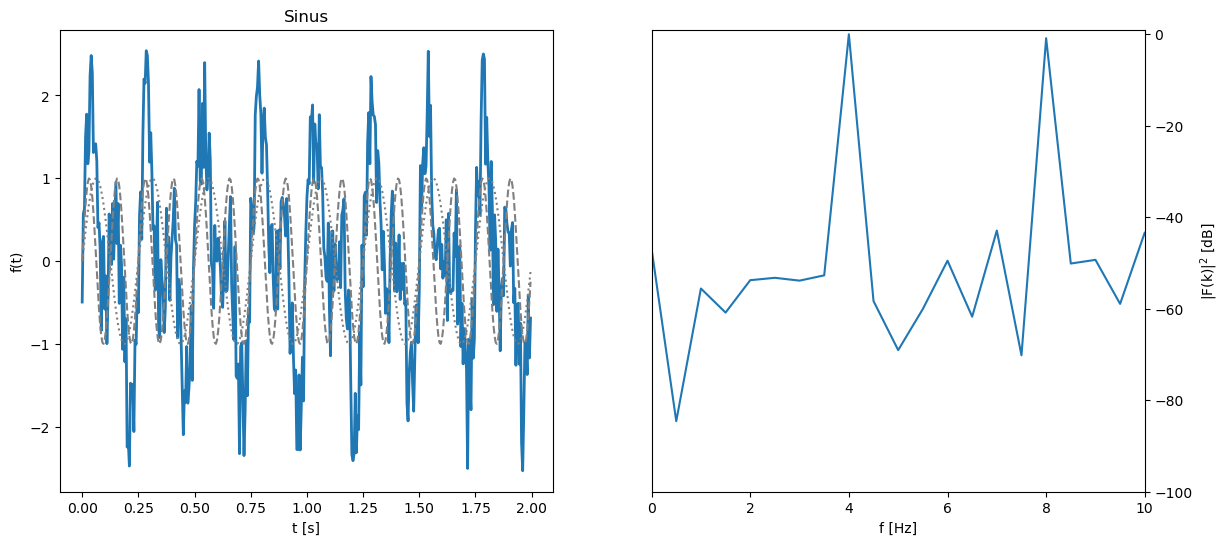

In [6]:
fig,axs = plt.subplots(1,2,figsize=(14,6))

axs[0].plot(t,f,linewidth=2)
axs[0].plot(t,f1,linestyle=':',color='gray')
axs[0].plot(t,f2,linestyle='--',color='gray')
axs[0].set_title('Sinus')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('f(t)')

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
axs[1].plot(sample_freq,power)
axs[1].set_xlabel('f [Hz]')

axs[1].set_ylabel('|F(k)|$^2$ [dB]')
axs[1].set_xlim([0.,10.])
axs[1].set_ylim([-100.,1.])

### Remove noise 
We cut the spectrum above a frequency of $f=8.5$ Hz by setting the values to zero, then transport the spectrum back
to the time domain.

In [5]:
# move sample_freq back to fft order
sample_freq = np.fft.ifftshift(sample_freq)
# cut away FFT data above threshold
Fnonoise[np.abs(sample_freq) > 8.5] = 0
# recover signal with inverse FFT
fnonoise = np.fft.ifft(Fnonoise)

# power spectrum
power = np.abs(Fnonoise)**2
power = 20*np.log10((power+tiny)/power.max())
# shift to center frequencies
sample_freq = np.fft.fftshift(sample_freq)
power       = np.fft.fftshift(power)

/opt/miniconda3/envs/python_pygimli/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-100.0, 1.0)

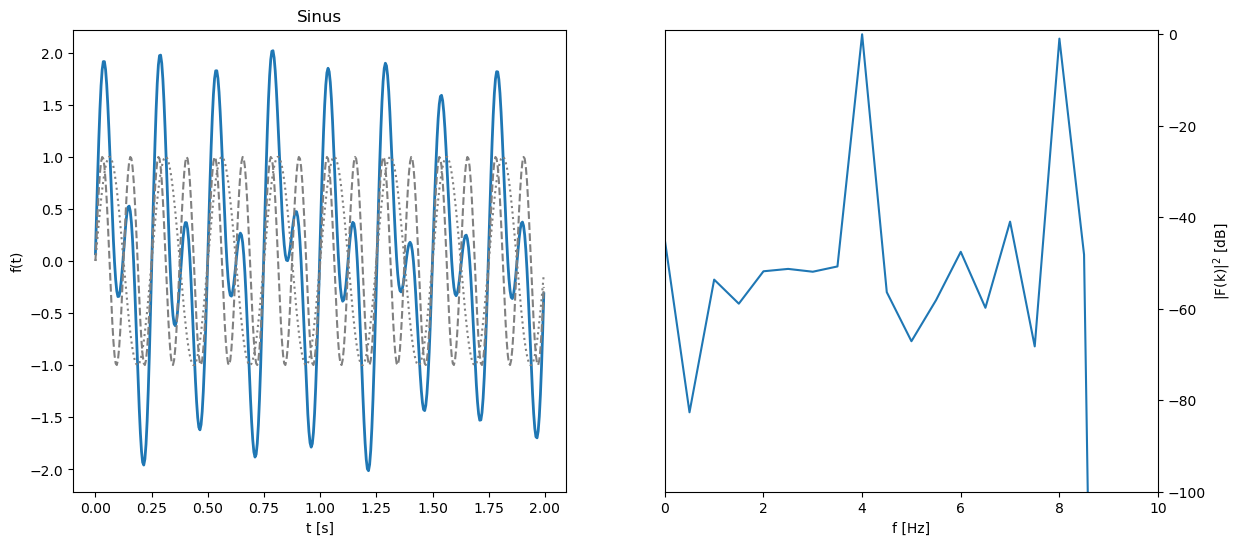

In [6]:
fig,axs = plt.subplots(1,2,figsize=(14,6))

axs[0].plot(t,fnonoise,linewidth=2)
axs[0].plot(t,f1,linestyle=':',color='gray')
axs[0].plot(t,f2,linestyle='--',color='gray')
axs[0].set_title('Sinus')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('f(t)')

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
axs[1].plot(sample_freq,power)
axs[1].set_xlabel('f [Hz]')

axs[1].set_ylabel('|F(k)|$^2$ [dB]')
axs[1].set_xlim([0.,10.])
axs[1].set_ylim([-100.,1.])

... done